# Introduction to Data Science 

# Kaosik Rajakumaran | 402662


## Exercise 1: understand/analyze the data

In [1]:
#Data Importing and cleaning

import pandas as pd

stationPrices = pd.read_csv('example_sprit_cut_prices.csv', delimiter=';')
stationInfos =pd.read_csv('example_sprit_cut_station.csv', delimiter=';')

#avoid repetitions-----------------
stationPrices.drop_duplicates(inplace=True) 
stationInfos.drop_duplicates(inplace=True)

#remove outlieres eg: negative values-------------------
zerosE5 = stationPrices[stationPrices["E5"]<=900] 
stationPrices.drop(zerosE5.index,axis=0,inplace=True)
zerosE10 = stationPrices[stationPrices["E10"]<=900]
stationPrices.drop(zerosE10.index,axis=0,inplace=True)
zerosDiesel = stationPrices[stationPrices["DIESEL"]<=900]
stationPrices.drop(zerosDiesel.index,axis=0,inplace=True)


#remove above 1999
stationPrices = stationPrices[stationPrices['E5']<1999]
stationPrices = stationPrices[stationPrices['E10']<1999]
stationPrices = stationPrices[stationPrices['DIESEL']<1999]

# 1 -  How many different stations exist in the data set and what is the existing history in days (bar chart)?


In [2]:

stationNames1 = stationPrices.STID.unique().tolist() #According to Prices File -stores all station names
stationNames2 = stationInfos.ID.unique().tolist() #According to Infos File -stores all station names

print('No. of stations (according to prices file) =',len(stationNames1))
print('No. of stations (according to station file) =',len(stationNames2))

No. of stations (according to prices file) = 400
No. of stations (according to station file) = 412


In [3]:
stationPrices.describe()


,E5,E10,DIESEL,CHANGED
count,1.075410e+06,1.075410e+06,1.075410e+06,1.075410e+06
mean,1.456998e+03,1.429060e+03,1.247649e+03,1.900288e+01
std,1.010980e+02,9.694743e+01,9.944484e+01,7.726273e+00
min,1.000000e+03,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.829000e+03,1.879000e+03,1.690000e+03,6.300000e+01


# 2 - What is the min, mean, max price for each gasoline type and station weekly


In [4]:
# What is the min, mean, max price for each gasoline type and station weekly
#string to date format


stationPrices['new_DATE_CHANGED']=pd.to_datetime(stationPrices['DATE_CHANGED'])#string to date format
stationPrices['new_DATE']=[d.date()for d in stationPrices['new_DATE_CHANGED']]#only date
sp = stationPrices.copy()

In [5]:
groupByWeek = sp.groupby(pd.Grouper(key='new_DATE_CHANGED',freq='W'))#group by week
#['E5','E10','DIESEL'].max()
maxGroupByWeek = groupByWeek['E5','E10','DIESEL'].max()
maxList = maxGroupByWeek.index.tolist() #xaxis 

minGroupByWeek = groupByWeek['E5','E10','DIESEL'].min()
minList = minGroupByWeek.index.tolist() #xaxis 

meanGroupByWeek = groupByWeek['E5','E10','DIESEL'].mean()
meanList = meanGroupByWeek.index.tolist() #xaxis 


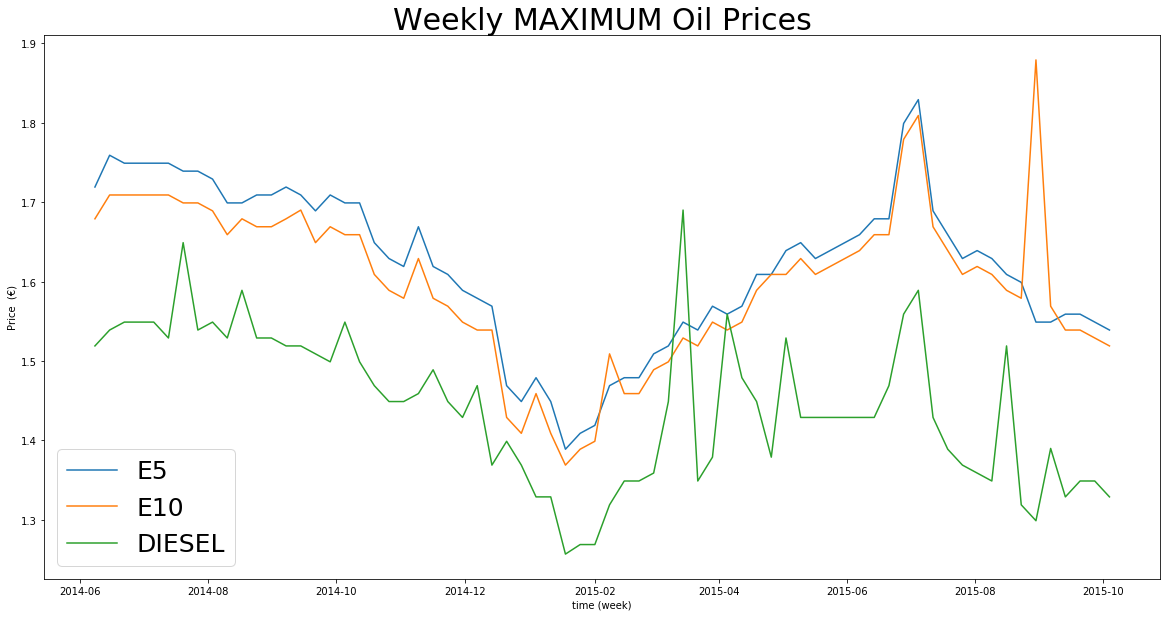

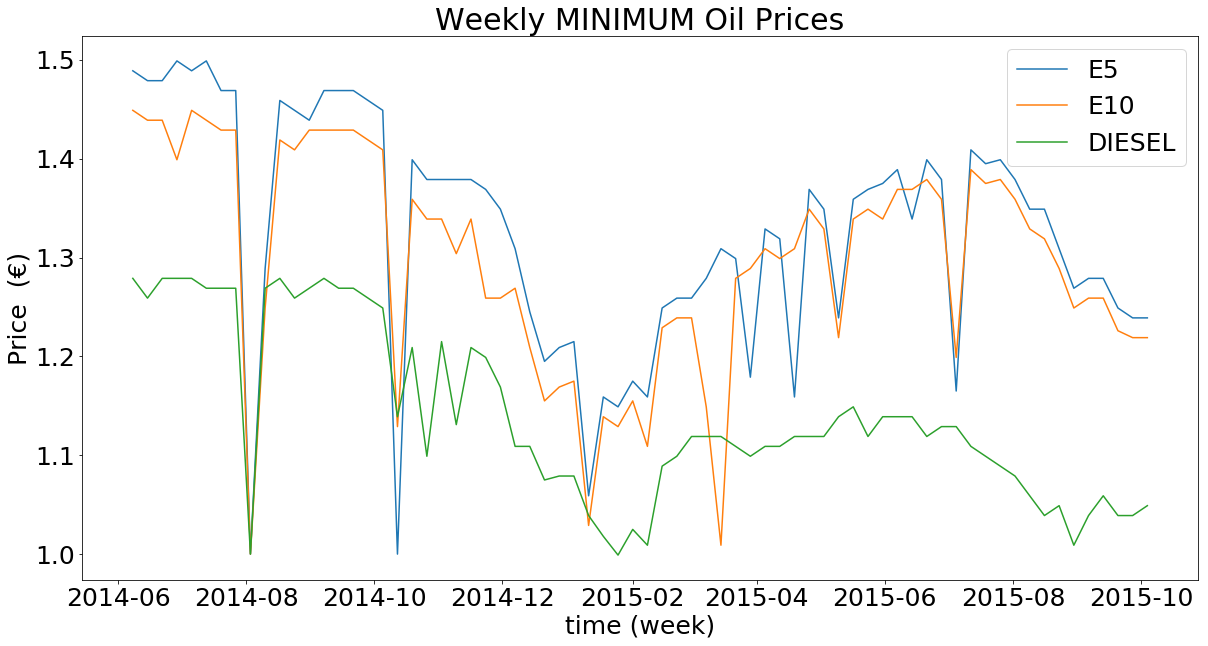

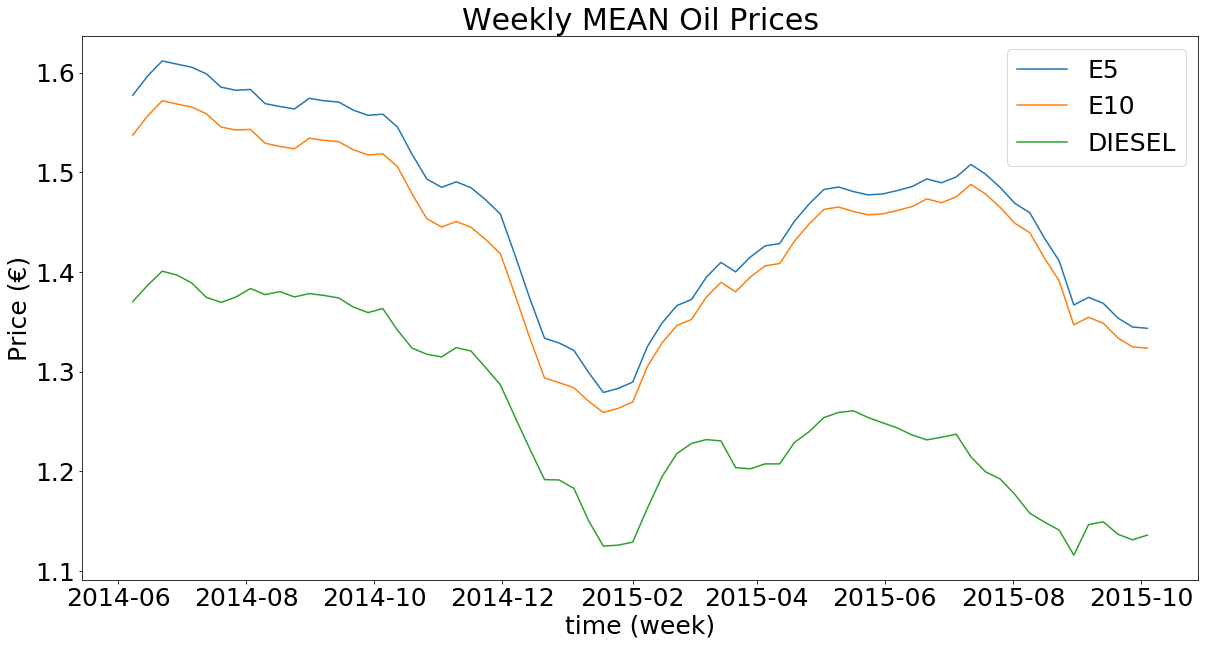

In [18]:
#plot figures
from matplotlib import pyplot as plt 

#max__________________________________________
plt.figure(figsize=(20,10))
plt.xlabel('time (week)')
plt.ylabel('Price  (€)')
plt.plot(maxList,maxGroupByWeek.E5.values/1000)
plt.plot(maxList,maxGroupByWeek.E10.values/1000)
plt.plot(maxList,maxGroupByWeek.DIESEL.values/1000)
plt.rcParams.update({'font.size':25}) 
plt.legend(labels=['E5', 'E10','DIESEL']);
plt.title('Weekly MAXIMUM Oil Prices');

#min__________________________________________
plt.figure(figsize=(20,10))
plt.xlabel('time (week)')
plt.ylabel('Price  (€)')
plt.plot(minList,minGroupByWeek.E5.values/1000)
plt.plot(minList,minGroupByWeek.E10.values/1000)
plt.plot(minList,minGroupByWeek.DIESEL.values/1000)
plt.rcParams.update({'font.size':25}) 
plt.legend(labels=['E5', 'E10','DIESEL']);
plt.title('Weekly MINIMUM Oil Prices');

#mean________________________________________
plt.figure(figsize=(20,10))
plt.xlabel('time (week)')
plt.ylabel('Price (€)')
plt.plot(meanList,meanGroupByWeek.E5.values/1000)
plt.plot(meanList,meanGroupByWeek.E10.values/1000)
plt.plot(meanList,meanGroupByWeek.DIESEL.values/1000)
plt.rcParams.update({'font.size':25}) 
plt.legend(labels=['E5', 'E10','DIESEL']);
plt.title('Weekly MEAN Oil Prices');

# 3 -  What is cheapest station (in average) and why?

In [7]:
groupSTID = sp.groupby('STID',as_index = False)
listgroupSTID = pd.DataFrame(list(groupSTID.groups.keys()),columns = ['STID'])
listgroupSTID['MeanPrice']=(groupSTID.E5.mean().E5+groupSTID.E10.mean().E10+groupSTID.DIESEL.mean().DIESEL)//3

print('Cheapest price:',listgroupSTID.MeanPrice.min()/1000,'€  (Average of E5,E10 & Diesel)')
print('Cheapest Station ID :' ,listgroupSTID.STID[listgroupSTID.MeanPrice.idxmin()])

cheapStationInfos = stationInfos.loc[stationInfos.ID == 'eef314cf-a84a-4648-9284-c2df1efa36c9']
print('Cheapest Station Name: ',cheapStationInfos.NAME)

Cheapest price: 1.279 €  (Average of E5,E10 & Diesel)
Cheapest Station ID : eef314cf-a84a-4648-9284-c2df1efa36c9
Cheapest Station Name:  77    Winkler-Kaiserslautern
Name: NAME, dtype: object


# 4 - At which day of a weak is the price most likely the cheapest (week profile)

In [8]:
import seaborn as sns #check if neede
from datetime import datetime
import calendar

sp['WEEKDAY'] = pd.to_datetime(sp['DATE_CHANGED']).apply(pd.datetime.weekday)#stores weekday information 
groupWeekday = sp.groupby(['WEEKDAY'])['DIESEL', 'E5', 'E10'] #group for each week day
groupWeekday = groupWeekday.mean().sum(axis=1)/3 #take mean of each e5,e10,diesel then add (e5+e10+diesel)/3 - whole avg


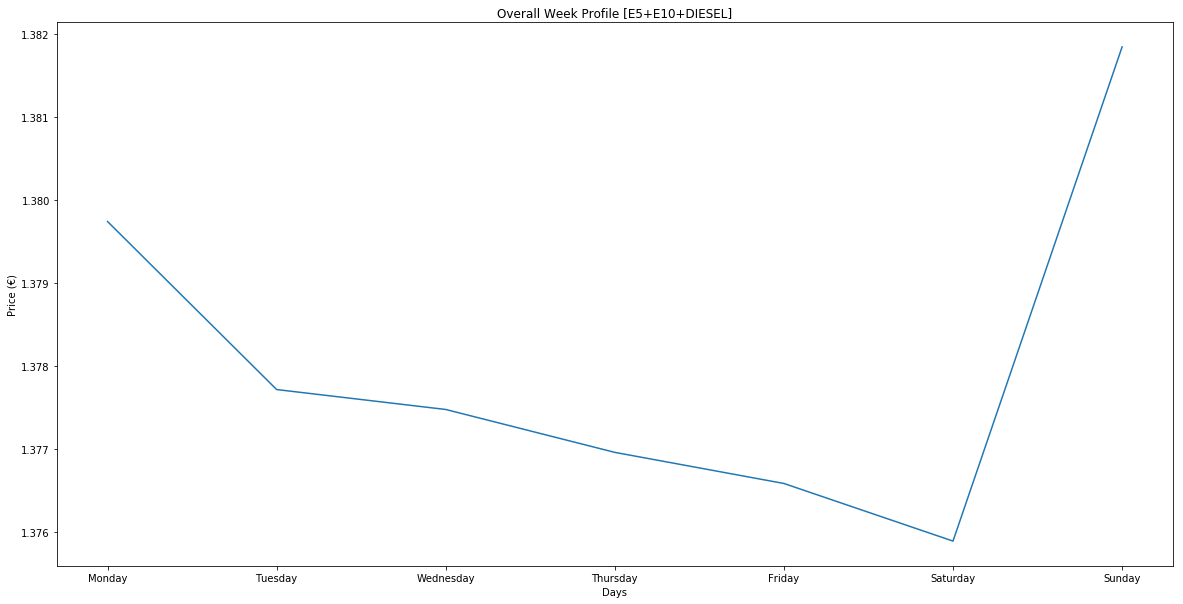

In [9]:
#plot
plt.figure(figsize=(20,10))
plt.xlabel('Days')
plt.ylabel('Price (€)')
plt.title('Overall Week Profile [E5+E10+DIESEL]')
plt.plot(calendar.day_name[0:7], groupWeekday/1000)

# 5 -  At which hour during a day is the price the cheapest in average (hour profile)

In [10]:
sp['HOUR'] = [pd.to_datetime(i).hour for i in sp['DATE_CHANGED']]
grouphours = sp.groupby(['HOUR'])['DIESEL', 'E5', 'E10'] #group for each week day
grouphours = grouphours.mean().sum(axis=1)/3 #take mean of each e5,e10,diesel then add (e5+e10+diesel)/3 - whole avg



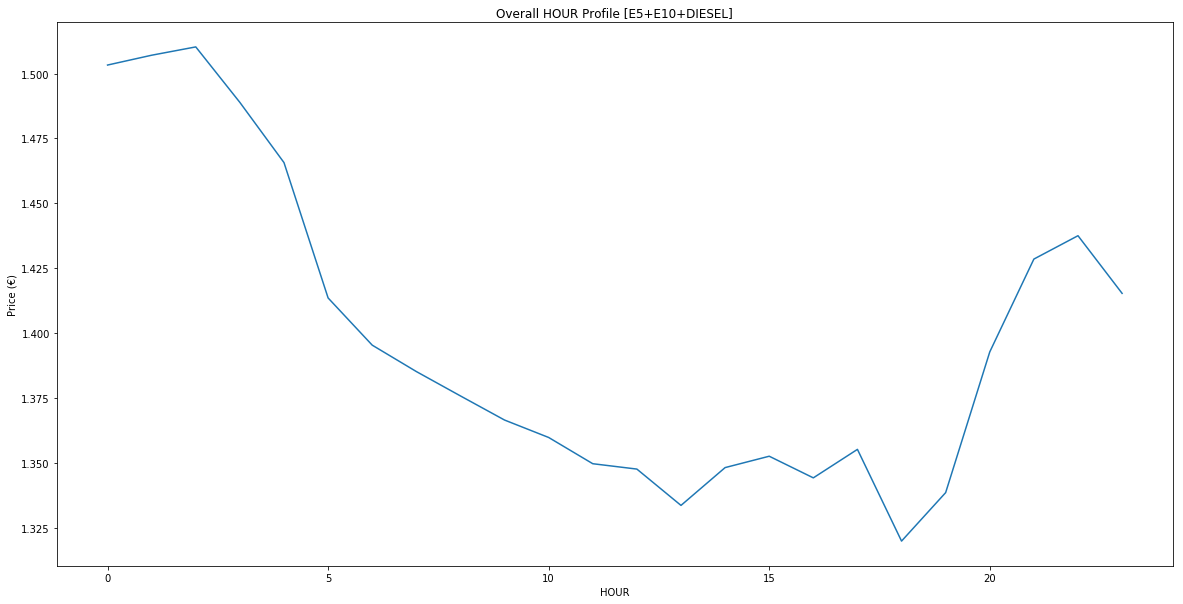

In [11]:
#plot
plt.figure(figsize=(20,10))
plt.xlabel('Time') #invalid
plt.ylabel('Price (€)')
plt.title('Overall HOUR Profile [E5+E10+DIESEL]')
grouphours = grouphours/1000;
grouphours.plot()

# 6 - How many different station locations are present in the data (visualize via a map)

In [17]:
numLocations = stationInfos[['LAT','LNG']] 
numLocations = numLocations.drop_duplicates(inplace=True)
print('Number of Different Station Locations = ',len(different_locations))



C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'different_locations' is not defined

# 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasonline types

In [15]:
numDataPoints = sp.groupby(['STID']).size() #stores size of each STID
mostPoints = numDataPoints[numDataPoints == max(numDataPoints)] #take max

mostPointsSTID = mostPoints.index[0]#STID
mostPointsValues = sp[sp.STID == mostPointsSTID]

mostPointsStationInfos = stationInfos.loc[stationInfos.ID == mostPointsSTID]



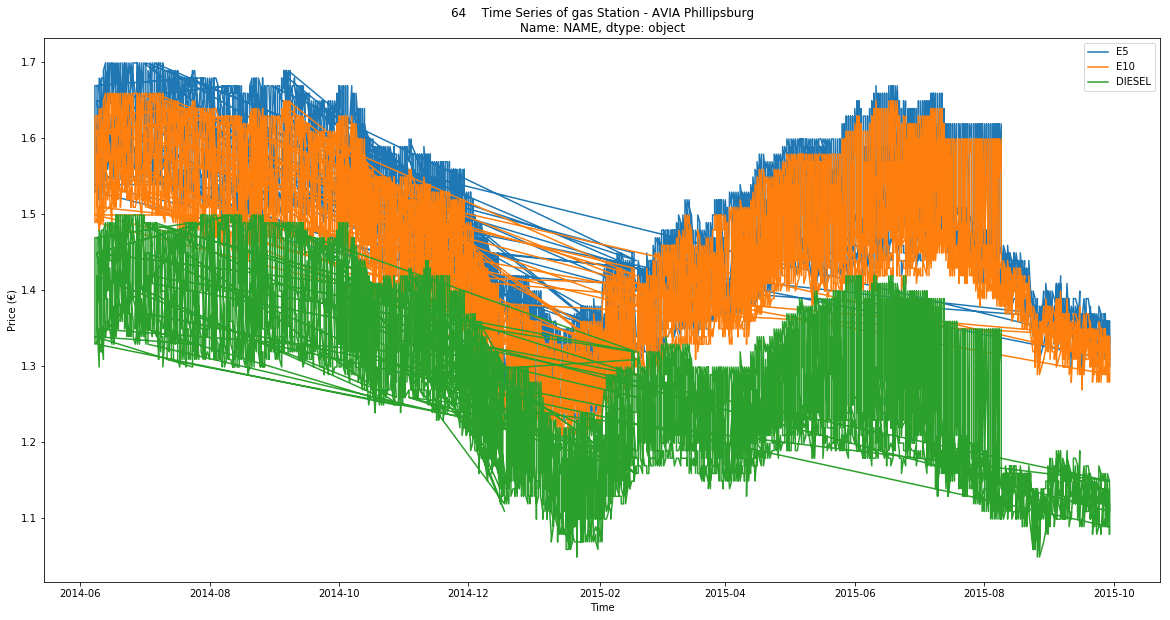

In [16]:
#plot

plt.figure(figsize=(20,10))

plt.plot(mostPointsValues.new_DATE,mostPointsValues['E5'].values/1000)
plt.plot(mostPointsValues.new_DATE,mostPointsValues['E10'].values/1000)
plt.plot(mostPointsValues.new_DATE,mostPointsValues['DIESEL'].values/1000)

plt.legend(labels=['E5','E10','DIESEL'])
plt.title('Time Series of gas Station - '+mostPointsStationInfos.NAME);
plt.xlabel('Time') ;
plt.ylabel('Price (€)');



# 8. At which hour during a day do we have the most price changes

The most price changes are at 12


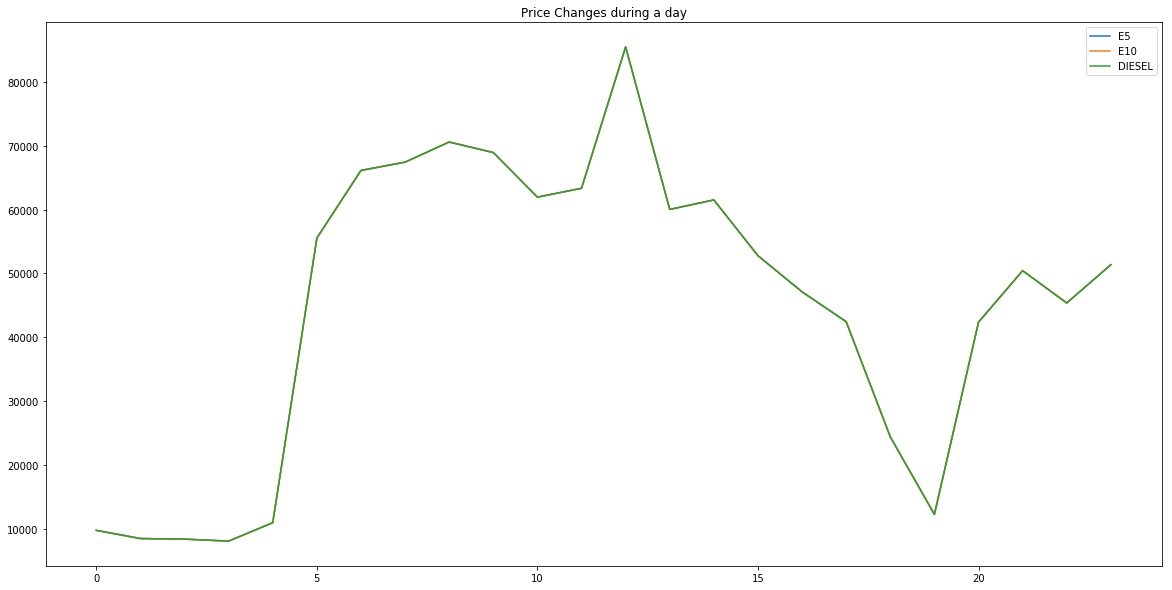

In [13]:
mostChangesE5 = sp.groupby(['HOUR'])['E5'].size()
mostChangesE10 = sp.groupby(['HOUR'])['E10'].size()
mostChangesDiesel = sp.groupby(['HOUR'])['DIESEL'].size()

mostChangesHour = max(mostChangesE5);
print('The most price changes are at 12' );
#plot
plt.figure(figsize=(20,10))
plt.plot(mostChangesE5)
plt.plot(mostChangesE10)
plt.plot(mostChangesDiesel)
plt.legend(labels=['E5','E10','DIESEL'])
plt.title('Price Changes during a day');

# 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

## Business Potential for the Customer
### 1. From the hour profile - it can be noticed that the prices are comparitively higher in the mid nights - Hence, visiting gas stations in the midnights should be avoided
### 2. Best time to fill up tanks is in the noons from 12.00 till 16.00 
### 3. Oil prices are comparitively higher in summer than in Winter.
### 4. Suprisingly price fluctuations during a day are identicial for E5, E10 and Diesel. This has to be taken in account while approaching cheap fuel stations.



## Constrains
### 1. Eventhough visiting fuel stations in the noons are recommended, the price fluctuations are very high at 12. This should be taken into consideration.
### 2. From the week profile it can be seen that the prices are higher on the weekends esp. on Sundays - But, the difference is negligible - around 5 cents
### 3. Visiting Cheap Petrol stations for long distance is not the best solution